In [1]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parcial III - Métodos Computacionales

### Nombre:

---

## ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


---

# 1

(**35 puntos**) El **método de Jacobi** es un algoritmo iterativo para resolver sistemas lineales de la forma:

$$
A \mathbf{x} = \mathbf{b},
$$

donde \$A\$ es una matriz cuadrada no singular. A diferencia del método de Gauss-Seidel, Jacobi utiliza exclusivamente los valores de la iteración anterior para actualizar todas las variables simultáneamente, lo que lo hace más sencillo de paralelizar pero, en general, con una convergencia más lenta.

## Algoritmo

Dado un sistema lineal \$A \mathbf{x} = \mathbf{b}\$, el método de Jacobi consiste en:

1. Elegir un vector inicial \$\mathbf{x}^{(0)}\$ (por ejemplo, el vector nulo).

2. Para cada iteración \$k\$ y cada componente \$i = 1, 2, ..., n\$, actualizar:

$$
x_i^{(k)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k-1)} \right)
$$

3. Repetir hasta que se cumpla un criterio de convergencia, como:

$$
\| \mathbf{x}^{(k)} - \mathbf{x}^{(k-1)} \| < \text{tolerancia}
$$

---

**a)** Escriba una función llamada `jacobi` que resuelva el sistema lineal \$A \mathbf{x} = \mathbf{b}\$ usando el método iterativo de Jacobi. La función debe aceptar como argumentos:

* La matriz \$A\$ y el vector \$\mathbf{b}\$,
* Una tolerancia (por defecto \$1\times 10^{-10}\$),
* Un número máximo de iteraciones.

Debe retornar la solución aproximada \$\mathbf{x}\$ y el número de iteraciones realizadas.

---

**b)** Aplique su función para resolver el siguiente sistema de ecuaciones lineales:

$$
\begin{cases}
10x_1 - x_2 + 2x_3 = 6 \\[2mm]
-2x_1 + 11x_2 - x_4 = 25 \\[2mm]
3x_1 - x_2 + 10x_3 - x_4 = -11 \\[2mm]
2x_2 - x_3 + 8x_4 = 15
\end{cases}
$$

Use como vector inicial \$\mathbf{x}^{(0)} = \[0, 0, 0, 0]^T\$. Imprima la solución aproximada y el número de iteraciones necesarias para adquirir la convergencia.

---

**c)** Compare su solución con `np.linalg.solve`. ¿Qué tan cercana es la solución iterativa a la exacta? Para esto, realice un gráfico del error usando la norma euclidiana (`np.linalg.norm`) en función de la tolerancia y otro del número de iteraciones, empleando un `np.logspace(-18, -1, 18)`.

---



In [189]:
# Aquí va su código
def jacobi(a,b,tol=1e-8,maxiter=1000):
  n= len(a)
  m = len(a[0])
  if n!=m:
    raise ValueError(f'la matriz no es cuadrada')
  x = b*0
  x_k= x.copy()
  # nombro k como el numero de iteraciones que de paso me servira para el plot
  for k in range(maxiter):

    # las iteraciones de j e i están en n siendo esta la longitud de la matriz a
    for i in range(n):
      suma = 0
      for j in range(n):
        if j!= i:# esta linea me toma los valores j distintos de i para comenzar a trabajar
          suma += a[i][j]*x_k[j] # defino la sumatoria que se va a iterar

      x[i] =((b[i])- suma)/a[i][i] # redefino x en la posición i como dicta el metodo de jacobi

    resta = np.linalg.norm(x-x_k) # llamo resta a la diferencia en las normas del vector solución
    if resta < tol:
      return x,k
    else:
      x_k= x.copy()
  return f' no se llegó a una convergencía inferior a la tolerancia en {maxiter} iteraciones',x,k


In [190]:
matriz= np.array([[10,-1,2,0],
                  [-2,11,0,-1],
                  [3,-1,10,-1],
                  [0,2,-1,8]], dtype=float)
b= np.array([6,25,-11,15], dtype=float)

print(jacobi(matriz,b))
print(np.linalg.solve(matriz,b))

(array([ 1.06736509,  2.56693873, -1.05335607,  1.10159581]), 16)
[ 1.06736509  2.56693873 -1.05335607  1.10159581]


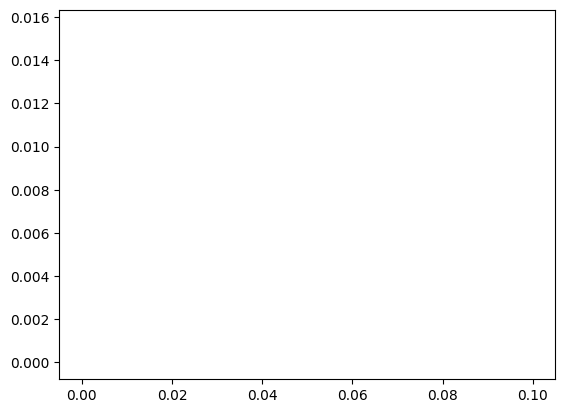

In [201]:
tolerancia = np.logspace(-18,-1,18)
resultado, iteraciones=(jacobi(matriz,b))

for t in tolerancia:
  resultado, iteraciones=(jacobi(matriz,b, tol = t))
  exacto= np.linalg.solve(matriz,b)
  error= np.linalg.norm(exacto-resultado)
  plt.plot(t, error, "b--")

# 2

(**50 puntos**) El sistema **masa-resorte con fricción** es un modelo clásico en física que describe el movimiento de una masa sujeta a una fuerza restauradora (resorte) y una fuerza disipativa (fricción o viscosidad). Su dinámica está gobernada por la ecuación diferencial de segundo orden:

$$
m y''(t) + c y'(t) + k y(t) = 0,
$$

donde:

* $m$ es la masa del objeto,
* $c$ es el coeficiente de fricción (amortiguamiento),
* $k$ es la constante del resorte,
* $y(t)$ es la posición de la masa respecto a su equilibrio.

---

**a)** Reformule esta ecuación como un sistema de primer orden adecuado para ser resuelto con `solve_ivp`. Explique mediante una función explicita y realice su documentación.

---

**b)** Considere el siguiente caso:

* Masa: $m = 1$ kg
* Constante del resorte: $k = 4$ N/m
* Coeficiente de fricción: $c = 0.5$ N·s/m
* Condiciones iniciales: $y(0) = 1$, $y'(0) = 0$
* Intervalo de tiempo: $t \in [0, 20]$

Utilice `solve_ivp` para resolver el sistema y grafique $y(t)$ como $y'(t)$. Interprete el comportamiento del sistema.

---

**c)** Simule dos escenarios adicionales:

1. Sin fricción: $c = 0$
2. Con fuerte fricción: $c = 4.5$

Grafique los tres casos \$y(t)\$ en una misma figura y compare los regímenes: **no amortiguado**, **subamortiguado**, y **sobreamortiguado**.

---

**d)** Para cada uno de los tres casos, calcule la **energía mecánica total** del sistema en función del tiempo. La energía total se define como la suma de energía cinética y potencial:

$$
E(t) = \frac{1}{2} m v^2 + \frac{1}{2} k y^2
$$

Grafique $E(t)$ para los tres escenarios simulados. Analice y compare el comportamiento de la energía en cada caso. ¿Qué sucede con la energía a lo largo del tiempo? ¿Cómo se relaciona esto con el valor del coeficiente de fricción $c$?


In [ ]:
# Aquí va su código

# 3

**(15 puntos)** Sea $A$ una matriz cuadrada de tamaño $n \times n$. Dos propiedades fundamentales de los autovalores de $A$ son:

1. **Determinante**:

   $$
   \det(A) = \prod_{i=1}^{n} \lambda_i
   $$

2. **Traza**:

   $$
   \mathrm{tr}(A) = \sum_{i=1}^{n} \lambda_i
   $$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando un conjunto de matrices aleatorias $A$ de $5\times 5$ (1000 matrices diferentes), verifique numéricamente ambas propiedades. Puede emplear las funciones `np.linalg.det`, `np.trace` y `np.linalg.eigvals`.


In [75]:
# Aquí va su código
def matriz_aleatorea(n):
  matriz= np.random.randint(1,1000000000,size=(n,n))
  return matriz


In [186]:
for i in range(1001):
  determinante= 1
  traza= 0
  matriz= matriz_aleatorea(5)
  valores_propios,vectores_propios= np.linalg.eig(matriz)
  for j in range(6):
    determinante*= valores_propios
    traza+= valores_propios
  print(matriz)
  print(f'la traza con la propiedad es{traza} y la traza de numpy es{np.trace(matriz)}')
  print(f' la determinante con la propiedad es {determinante} y con numpy es {np.linalg.det(matriz)}')


[[300672397 138383281 827389483 692931144 383455679]
 [499316372 236572351 270066162 576695450 768988649]
 [718096519 324767382 905819978 391972436 798488070]
 [866877415 270787534 816857328 846716004 997568587]
 [653300632 189595818 509160943 368826822 944548076]]
la traza con la propiedad es[ 1.74186657e+10+0.0000000e+00j -1.52147192e+09+0.0000000e+00j
  1.41465171e+09+0.0000000e+00j  1.04706366e+09+7.9721137e+08j
  1.04706366e+09-7.9721137e+08j] y la traza de numpy es3234328806
 la determinante con la propiedad es [ 5.98662161e+56+0.00000000e+00j  2.65874169e+50-0.00000000e+00j
  1.71786750e+50+0.00000000e+00j -8.04830912e+49-7.69358076e+49j
 -8.04830912e+49+7.69358076e+49j] y con numpy es -8.350105687201151e+42
[[260779890 761877375 597989338 629661645 938978730]
 [966197237 716784762 889417269 198079291 744915239]
 [875656618 758315825 494845122 835755547 400807870]
 [554514235 554705127 414791333 130185146  18016299]
 [335761827 401473981 961119328 297008689 103775351]]
la traza 